In [1]:
# Import libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset

In [3]:
# Read in California housing dataset.
from sklearn.datasets import fetch_california_housing


housing = fetch_california_housing()

### Preparing the data

In [7]:
# Import train_test_split.
from sklearn.model_selection import train_test_split


# Create features X and target y.
X = pd.DataFrame(housing.data, columns=housing.feature_names)[["AveRooms"]]
y = housing.target  # Median house value in $100,000s


# Split the dataset into training (80%) and testing (20%) sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Import StandardScaler.
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler.
scaler = StandardScaler()

# Fit and transform training data.
X_train_scaled = scaler.fit_transform(X_train)

# Also transform test data.
X_test_scaled = scaler.transform(X_test)

In [11]:
# Import LinearRegression.
from sklearn.linear_model import LinearRegression


# Instantiate linear regression model.
model = LinearRegression()

In [13]:
# Fit the model to the training data.
model.fit(X_train_scaled, y_train)

LinearRegression()

In [15]:
# Make predictions on the testing data.
y_pred = model.predict(X_test_scaled)

In [17]:
# Import metrics.
from sklearn.metrics import mean_squared_error, r2_score


# Calculate and print R^2 score.
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.4f}")

R-squared: 0.0138


R2 < 0: The model performs worse than simply using the mean, indicating a poor fit.

In [19]:
# Calculate and print MSE.
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse:.4f}")


# Calculate and print RMSE.
rmse = mse ** 0.5
print(f"Root mean squared error: {rmse:.4f}")

Mean squared error: 1.2923
Root mean squared error: 1.1368


## Working with Multiple Linear Regression in scikit-learn

In [23]:
# Uses all features.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Load data set.
housing = fetch_california_housing()


# Split into X, y.
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target  # Median house value in $100,000s
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Scale the data.
scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Create model and fit it to the training data.
model = LinearRegression()
model.fit(X_train_scaled, y_train)


# Make predictions.
y_pred = model.predict(X_test_scaled)


# Calculate and print errors.
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.4f}")


mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse:.4f}")


rmse = mse ** 0.5
print(f"Root mean squared error: {rmse:.4f}")

R-squared: 0.5758
Mean squared error: 0.5559
Root mean squared error: 0.7456


# Multicollinearity
Variance Inflation Factor (VIF) is a metric used to detect multicollinearity among predictors.

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
X = pd.DataFrame(housing.data, columns=housing.feature_names)


# Compute the correlation matrix.
corr_matrix = X.corr()


# Identify pairs of features with high collinearity (correlation > 0.8 or < -0.8).
high_corr_features = [(col1, col2, corr_matrix.loc[col1, col2])
                     for col1 in corr_matrix.columns
                     for col2 in corr_matrix.columns
                     if col1 != col2 and abs(corr_matrix.loc[col1, col2]) > 0.8]


# Convert to a DataFrame for better visualization.
collinearity_df = pd.DataFrame(high_corr_features, columns =["Feature 1", "Feature 2", "Correlation"])
print("\nHighly Correlated Features:\n", collinearity_df)


# Compute the Variance Inflation Factor (VIF) for each feature.
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


# Print VIF values.
print("\nVariance Inflation Factor (VIF) for each feature:\n", vif_data)


Highly Correlated Features:
    Feature 1  Feature 2  Correlation
0   AveRooms  AveBedrms     0.847621
1  AveBedrms   AveRooms     0.847621
2   Latitude  Longitude    -0.924664
3  Longitude   Latitude    -0.924664

Variance Inflation Factor (VIF) for each feature:
       Feature         VIF
0      MedInc   11.511140
1    HouseAge    7.195917
2    AveRooms   45.993601
3   AveBedrms   43.590314
4  Population    2.935745
5    AveOccup    1.095243
6    Latitude  559.874071
7   Longitude  633.711654


### Regression coefficients

In [31]:
print("Intercept:", model.intercept_)


coeff_df = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})
print("\nFeature Coefficients:\n", coeff_df)

Intercept: 2.0719469373788777

Feature Coefficients:
       Feature  Coefficient
0      MedInc     0.854383
1    HouseAge     0.122546
2    AveRooms    -0.294410
3   AveBedrms     0.339259
4  Population    -0.002308
5    AveOccup    -0.040829
6    Latitude    -0.896929
7   Longitude    -0.869842


## Summarizing model results

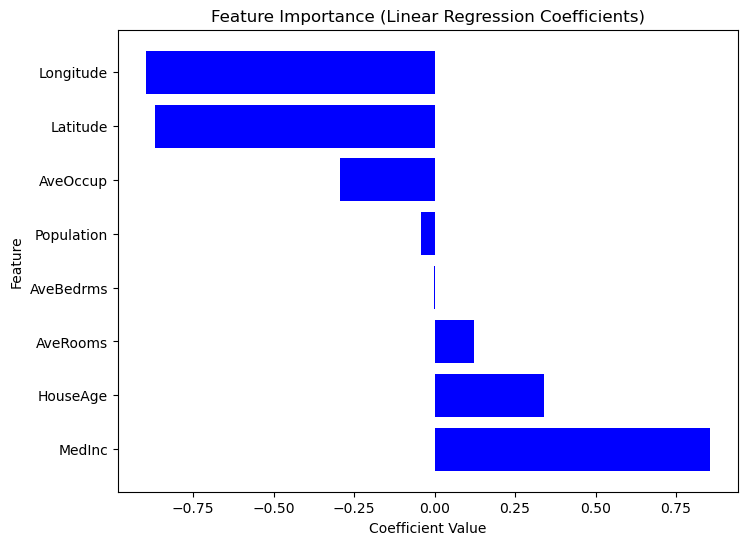

In [37]:
# Sort dataframe by coefficients.
coef_df_sorted = coeff_df.sort_values(by="Coefficient", ascending=False)


# Create plot.
plt.figure(figsize=(8,6))
plt.barh(coeff_df["Feature"], coef_df_sorted["Coefficient"], color="blue")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.show()

### visualize residuals and the regression fit

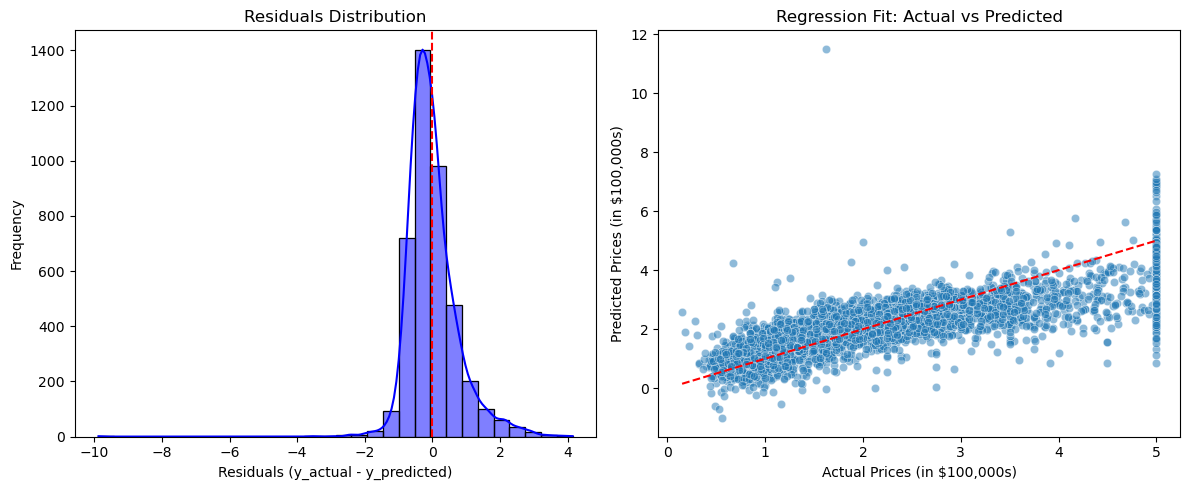

In [42]:
# Compute residuals.
residuals = y_test - y_pred


# Create plots.
plt.figure(figsize=(12,5))


# Plot 1: Residuals Distribution.
plt.subplot(1,2,1)
sns.histplot(residuals, bins=30, kde=True, color="blue")
plt.axvline(x=0, color='red', linestyle='--')
plt.title("Residuals Distribution")
plt.xlabel("Residuals (y_actual - y_predicted)")
plt.ylabel("Frequency")


# Plot 2: Regression Fit (Actual vs Predicted).
plt.subplot(1,2,2)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect fit line
plt.title("Regression Fit: Actual vs Predicted")
plt.xlabel("Actual Prices (in $100,000s)")
plt.ylabel("Predicted Prices (in $100,000s)")


# Show plots.
plt.tight_layout()
plt.show()

The residuals distribution (left plot) should be centered around zero, indicating that errors are randomly distributed. If the residuals follow a normal distribution, the model fits well, but if there is skewness or a trend, it may suggest systematic errors. The regression fit (right plot) compares actual vs. predicted values, with the red dashed line representing a perfect fit. If points closely follow the line, predictions are accurate, but if a pattern (e.g., a curve) appears, the relationship may not be truly linear. 